# Understanding and Predicting Employee Turnover

## HR Analytics

### Objective: 
- To understand what factors contributed most to employee turnover.

- To perform clustering to find any meaningful patterns of employee traits.

- To create a model that predicts the likelihood if a certain employee will leave the company or not. 

- To create or improve different retention strategies on targeted employees. 

The implementation of this model will allow management to create better decision-making actions.

### The Problem:

One of the most common problems at work is **turnover.** 

Replacing a worker earning about **50,000 dollars** cost the company about **10,000 dollars** or 20% of that worker’s yearly income according to the Center of American Progress.

Replacing a high-level employee can cost a multiple of that.

**Cost include:**
- Cost of off-boarding 
- Cost of hiring (advertising, interviewing, hiring)
- Cost of onboarding a new person (training, management time)
- Lost productivity (a new person may take 1-2 years to reach the productivity of an existing person)

**Annual Cost of Turnover** = (Hiring + Onboarding + Development + Unfilled Time) * (Number of Employees x Annual Turnover Percentage)

**Annual Cost of Turnover** = (1,000 + 500) x (15,000 * 24%)

**Annual Cost of Turnover** = 1500 x 3600

**Annual Cost of Turnover** = 5400000

## Example

1. Jobs (earning under 30k a year): the cost to replace a 10/hour retail employee would be **3,328 dollars**.
2. Jobs (earning 30k-50k a year) - the cost to replace a 40k manager would be **8,000 dollars**.
3. Jobs of executives (earning 100k+ a year) - the cost to replace a 100k CEO is **213,000 dollars**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\Mrunal\\Documents\\EDA based project'

In [3]:
df = pd.read_csv('HR-data.csv')

### Data Quality Check

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'})

In [6]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction           14999 non-null float64
evaluation             14999 non-null float64
projectCount           14999 non-null int64
averageMonthlyHours    14999 non-null int64
yearsAtCompany         14999 non-null int64
workAccident           14999 non-null int64
turnover               14999 non-null int64
promotion              14999 non-null int64
department             14999 non-null object
salary                 14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().any()

satisfaction           False
evaluation             False
projectCount           False
averageMonthlyHours    False
yearsAtCompany         False
workAccident           False
turnover               False
promotion              False
department             False
salary                 False
dtype: bool

In [10]:
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

# Exploratory Data Analysis (EDA)

In [11]:
df.shape

(14999, 10)

In [12]:
#Actual turnover rate

turnover_rate = df['turnover'].value_counts()
turnover_rate

0    11428
1     3571
Name: turnover, dtype: int64

#### We see a class imbalance

In [13]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### We can see different features values for (Turnover vs Non-turnover)

The people who left the company have 44% satisfaction, but those who did not leave have 66% satisfaction
(Lower the satisfaction, higher the turnover)

In [14]:
turnover_summary.std()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
1,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759


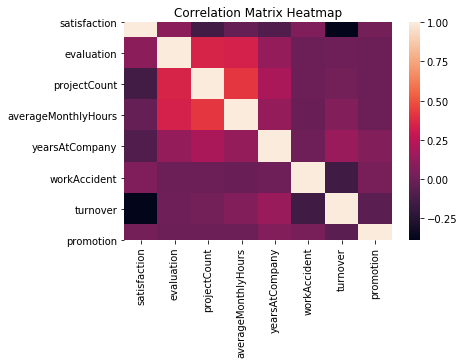

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [15]:
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
plt.title('Correlation Matrix Heatmap')
plt.show()
corr

We see a **HIGH** correlation of **target (Turnover)** and **satisfaction**

We also see a **HIGH** correlation of **projectcount** and **averageMonthlyHours** with **Evaluation**.

## EDA1: Distributions of high correlation features:

### 1. satisfaction
### 2. projectcount
### 3. averageMonthlyHours

Text(0, 0.5, 'Employee count')

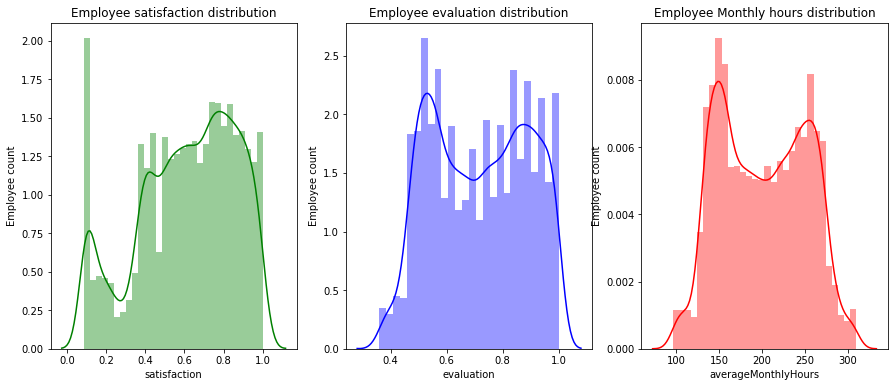

In [16]:
# Visualization of satisfaction, evaluation, project count

fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df.satisfaction, kde=True, color='green', ax=ax_1)
ax_1.set_title('Employee satisfaction distribution')
ax_1.set_ylabel('Employee count')

sns.distplot(df.evaluation, kde=True, color='blue', ax=ax_2)
ax_2.set_title('Employee evaluation distribution')
ax_2.set_ylabel('Employee count')

sns.distplot(df.averageMonthlyHours, kde=True, color='red', ax=ax_3)
ax_3.set_title('Employee Monthly hours distribution')
ax_3.set_ylabel('Employee count')

## EDA2:

### Satisfaction VS Evaluation

We can make **3** distinct clusters for employees who left the company
 
**Cluster 1 (Hard-working and Sad Employee):** 
- Satisfaction was below 0.2
- Evaluations were greater than 0.75. 
- Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 
- **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** 
- Satisfaction between about 0.35~0.45
- Evaluations below ~0.58.
- This could be seen as employees who were badly evaluated and felt bad at work.
- **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** 
- Satisfaction between 0.7~1.0 
- Evaluations were greater than 0.8.
- Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 
- **Question:** Could this cluser mean that employees left because they found another job opportunity?

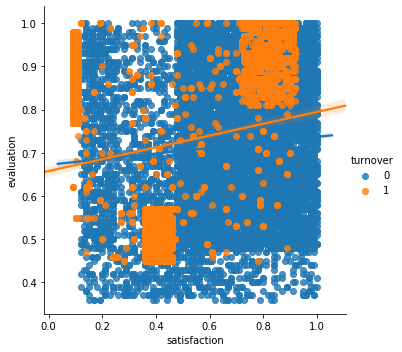

In [17]:
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=True, hue='turnover')

In [18]:
#Clustering

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,random_state=2)

km.fit(df[df['turnover']==1][['satisfaction','evaluation']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [19]:
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in km.labels_]

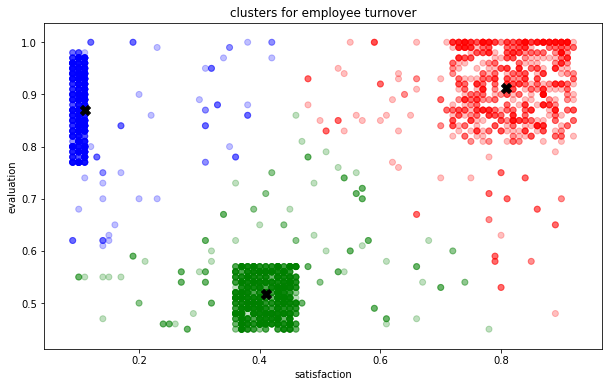

In [20]:
plt.figure(figsize=(10,6))

plt.scatter(x='satisfaction', y='evaluation', data=df[df['turnover']==1], alpha=0.25, color = kmeans_colors)
plt.xlabel('satisfaction')
plt.ylabel('evaluation')
plt.title('clusters for employee turnover')

plt.scatter(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], color='black', marker='X', s=100)
plt.show()

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee 

**Cluster 3 (Green):** Hard-working and Happy Employee 

## EDA3: Employee satisfaction

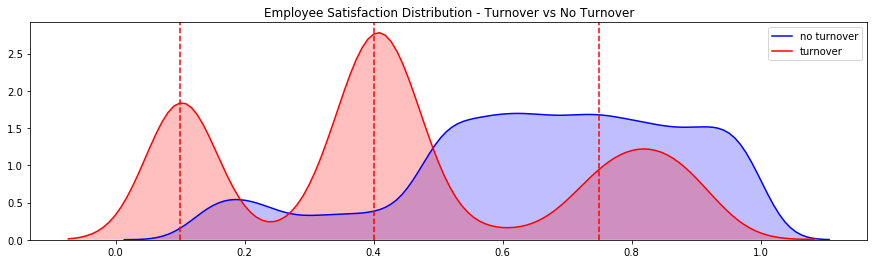

In [21]:
#KDE plot

fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover vs No Turnover')
plt.axvline(x=0.1,linestyle='--',color='r')
plt.axvline(x=0.4,linestyle='--',color='r')
plt.axvline(x=0.75,linestyle='--',color='r')

There is a **tri-modal** distribution for employees that turnovered
- Employees who had really low satisfaction levels **(0.2 or less)** left the company more
- Employees who had low satisfaction levels **(0.3~0.5)** left the company more
- Employees who had really high satisfaction levels **(0.7 or more)** left the company more

## EDA4: Employee Project Count 

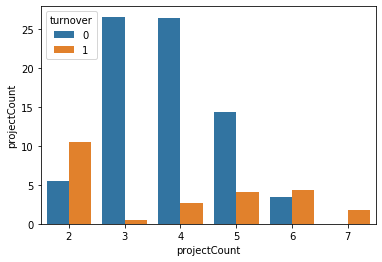

In [22]:
sns.barplot(x='projectCount',y='projectCount', hue='turnover', data=df, estimator=lambda x: len(x) / len(df) * 100)

Here we can see aggregation of data towards front and far end, we can say that:

- The people who left the company, who were handling less project may be **interns** at the company.
- The people who left the company, who were handling significantly more projects may be the ones who work too much and have terms of employement around 6-7 years.

## EDA5: Employee department distribution

In [23]:
hrleft = df[df['turnover']==1]

hrleft = pd.DataFrame(hrleft['department'].value_counts()).reset_index()
hrstay = pd.DataFrame(df['department'].value_counts()).reset_index()

In [24]:
hrmerge = pd.merge(hrleft, hrstay, how='inner', on='index')

In [25]:
hrmerge

,index,department_x,department_y
0,sales,1014,4140
1,technical,697,2720
2,support,555,2229
3,IT,273,1227
4,hr,215,739
5,accounting,204,767
6,marketing,203,858
7,product_mng,198,902
8,RandD,121,787
9,management,91,630


In [26]:
hrmerge = hrmerge.rename(columns={"department_x":'left', "department_y":'stay', "index":'department' })
hrmerge

,department,left,stay
0,sales,1014,4140
1,technical,697,2720
2,support,555,2229
3,IT,273,1227
4,hr,215,739
5,accounting,204,767
6,marketing,203,858
7,product_mng,198,902
8,RandD,121,787
9,management,91,630


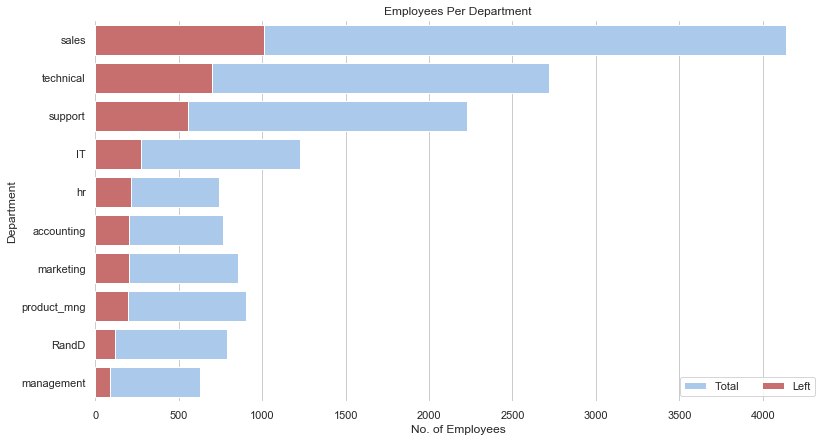

In [27]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(figsize=(13, 7))
sns.set_color_codes('pastel')
sns.barplot(x='stay', y='department', data=hrmerge, label='Total', color='b')

sns.set_color_codes("muted")
sns.barplot(x='left', y='department', data=hrmerge, label='Left', color='r')

axes.legend(ncol=2, loc="lower right", frameon=True)
axes.set_ylabel('Department')
axes.set_title('Employees Per Department')
axes.set_xlabel('No. of Employees')
sns.despine(left=True, bottom=True)

### We can see that sales, support and technical team have more turnover rate.

We can perform additional EDA on these three to understand the reason for turnover of employees.

## EDA5: Average Monthly Hours

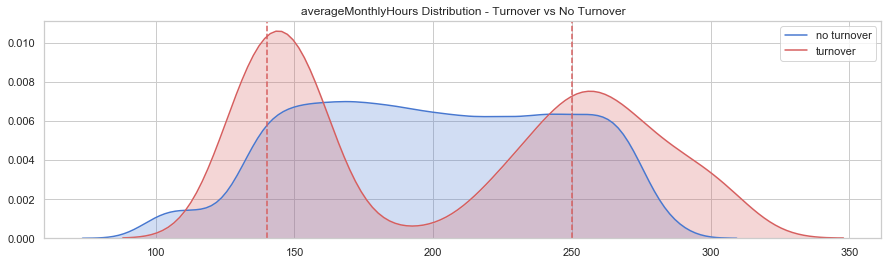

In [28]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('averageMonthlyHours Distribution - Turnover vs No Turnover')
plt.axvline(x=140,linestyle='--',color='r')
plt.axvline(x=250,linestyle='--',color='r')

A bi-modal distribution for employees that turnovered:

- Employees who had less hours of work **(~140hrs or less)** left the company more **(Underworked)**
- Employees who had too many hours of work **(~250hrs or more)** left the company **(Overworked)**

# Data Preprocessing

In [29]:
cat_var = ['department','salary']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident','promotion','turnover']

#Using one hot encoding for categorical variables
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

In [30]:
new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,turnover
0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0,0,1
1,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0,0,1
4,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0,0,1


## Data imbalance

In [31]:
df.turnover.value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

Text(0, 0.5, 'Count')

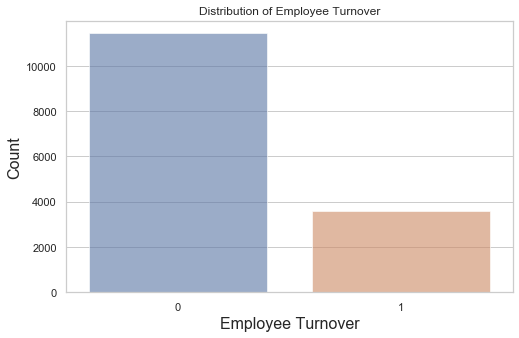

In [32]:
plt.figure(figsize=(8,5))
turnover = df.turnover.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

#### We use resampling methods after performing train-test split on given dataset

There are many ways of dealing with imbalanced data. We will focus in the following approaches:

1. Oversampling — SMOTE
2. Undersampling — RandomUnderSampler

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

In [35]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1], y_train[y_train == 1], replace=True, n_samples=X_train[y_train == 0].shape[0], random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0], y_train[y_train == 0], replace=True, n_samples=X_train[y_train == 1].shape[0], random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (11999, 18) (11999,)
Upsampled shape: (18284, 18) (18284,)
SMOTE sample shape: (18284, 18) (18284,)
Downsampled shape: (5714, 18) (5714,)


### Choosing with sampled data to use for modeling:

#### Train on Original, Upsampled, SMOTE, and Downsampled Data

Train a Logistic Regression Model to the **original, upsampled, and downsampled data** to see which performs best. 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

methods_data = {"Original": (X_train, y_train), "Upsampled": (X_train_u, y_train_u), "SMOTE":(x_train_sm, y_train_sm), "Downsampled": (X_train_d, y_train_d)}

In [37]:
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
    
cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

The best F1 Score for Original data:
0.49696769610933467


C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

The best F1 Score for Upsampled data:
0.7665404466254615


C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

The best F1 Score for SMOTE data:
0.7842473202474542


C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

The best F1 Score for Downsampled data:
0.7739081807829413


C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

0.5967865878477144

### Result:

- **Original Sample**: F1 Score 44.96%
- **Upsample:** F1 Score 77.93%
- **SMOTE:** F1 Score 78.8%
- **Downsample:** F1 Score 77.85%

So we select the highest score samples - **SMOTE** samples

# Modeling

### Using F1score as evaluation metrics

## 1. Logistic regression

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
y_pred = lr.predict(X_test)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, y_pred)

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, y_pred))

C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




 ---Logistic Regression Model---
Logistic Regression AUC = 0.76
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2286
           1       0.50      0.77      0.61       714

    accuracy                           0.76      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.76      0.78      3000



C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


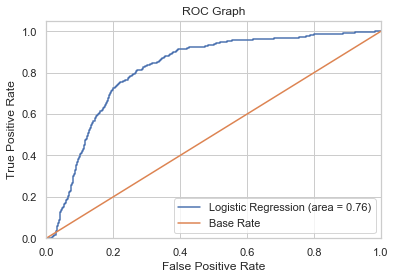

In [39]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## 2. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

0.980831399940854

In [41]:
rf = rf.fit(x_train_sm, y_train_sm)
y_pred = rf.predict(X_test)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, y_pred)

print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, y_pred))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



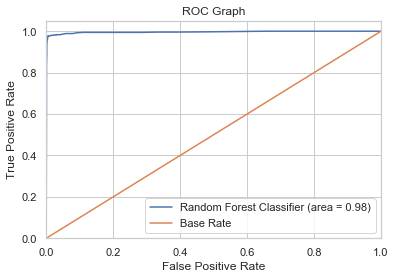

In [42]:
# Create ROC Graph
from sklearn.metrics import roc_curve

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## 3. Gradient boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()  
gbc = gbc.fit(x_train_sm,y_train_sm)
y_pred = gbc.predict(X_test)

gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.9576953089675155

In [44]:
print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, y_pred)

print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, y_pred))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.96
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



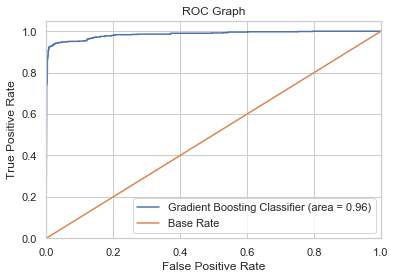

In [45]:
# Create ROC Graph
from sklearn.metrics import roc_curve

gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [46]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1741,  545],
       [ 167,  547]], dtype=int64)

In [47]:
confusion_matrix(y_test, rf.predict(X_test))

array([[2262,   24],
       [  16,  698]], dtype=int64)

In [48]:
confusion_matrix(y_test, gbc.predict(X_test))

array([[2227,   59],
       [  43,  671]], dtype=int64)

## Feature importance:

In [49]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction,0.265926
1,yearsAtCompany,0.234966
2,projectCount,0.157432
3,averageMonthlyHours,0.150204
4,evaluation,0.127722
5,workAccident,0.025652
6,salary_low,0.007465
7,salary_medium,0.004640
8,department_sales,0.004317
9,department_technical,0.004129


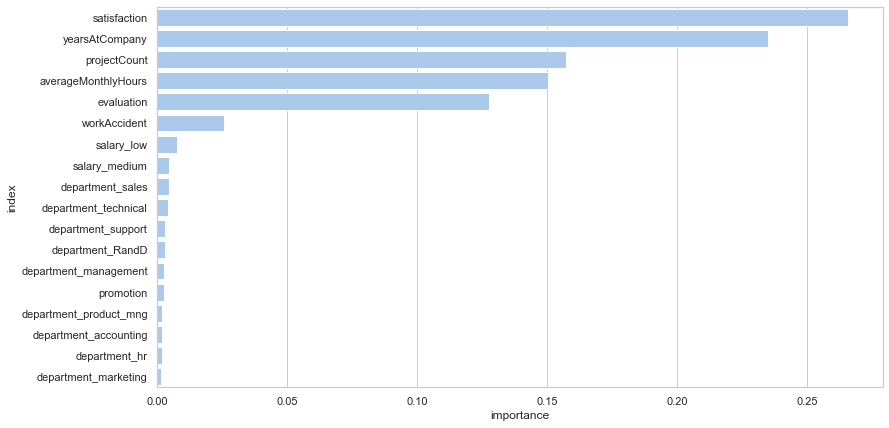

In [50]:
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances, label="Total", color="b")

## Retention plan

Since this model is being used for people, we should refrain from soley relying on the output of our model. Instead, we can use it's probability output and design our own system to treat each employee accordingly. 

1.	**Safe Zone (Green)** – Employees within this zone are considered safe. 
2.	**Low Risk Zone (Yellow)** – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3.	**Medium Risk Zone (Orange)** – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly. 
4.	**High Risk Zone (Red)** – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately. 

In [51]:
rf.predict_proba(X_test)[175:225]

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.87, 0.13],
       [0.9 , 0.1 ],
       [0.01, 0.99],
       [0.12, 0.88],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.68, 0.32],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.86, 0.14],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.91, 0.09],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.93, 0.07],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  ,

## Conclusion:

**Binary Classification**: Turnover V.S. Non Turnover

**Instance Scoring**: Likelihood of employee responding to an offer/incentive to save them from leaving.

**Need for Application**: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. 
We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances. 

Consider employee turnover domain where an employee is given treatment by Human  Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth. 

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. 
Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly. 
 
 **Solution 1:** 
 - We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
 - OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

**Solution 2:** 
Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:
 - Be a good coach
 - Empower the team and do not micromanage
 - Express interest for team member success
 - Have clear vision / strategy for team
 - Help team with career development

## Selection bias:

- One thing to note about this dataset is the turnover feature. We don't know if the employees that left are interns, contractors, full-time, or part-time. These are important variables to take into consideration when performing a machine learning algorithm to it. 

- Another thing to note down is the type of bias of the evaluation feature. Evaluation is heavily subjective, and can vary tremendously depending on who is the evaluator. If the employee knows the evaluator, then he/she will probably have a higher score. 